In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\ACER\Desktop\ML\09-K-Means-Clustering\02-income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


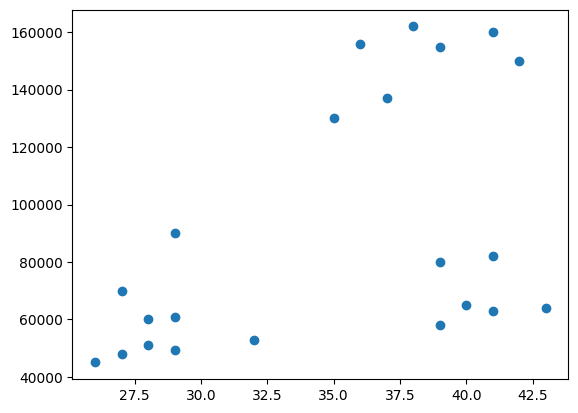

In [6]:
plt.scatter(df['Age'], df['Income($)'])

In [7]:
km = KMeans(n_clusters = 2)
km

KMeans(n_clusters=2)

In [8]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])  # 0 and 1 represent the clusters (we had given initial clusters as 2)
y_predicted

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

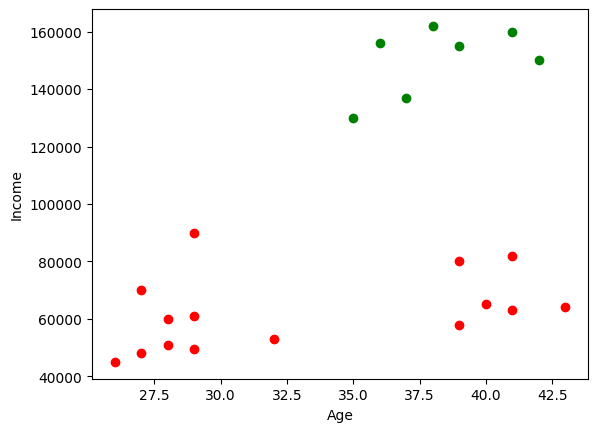

In [16]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1.Age, df1['Income($)'], color = 'red')
plt.scatter(df2.Age, df2['Income($)'], color = 'green')

plt.xlabel('Age')
plt.ylabel('Income')
